<h1>GRADUATE ROTATIONAL INTERNSHIP PROGRAM (GRIP)
<h1>COMPUTER VISION AND IOT [#GRIPJULY21]
<h1>TASK2: TO IDENTIFY COLORS IN AN IMAGE
<h1>NAME: TANMAY RAJ

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
%matplotlib inline

<b>Importing the image and Converting BRG color space to RGB

In [19]:
def image(datapath):
    img = cv2.imread(datapath)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

<b>Converting RGB to HEX

In [20]:
def rgb_to_hex(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

<b>Here is where everything is happening. I have explained each code line by line.This function returns Image and the piechart Plot of top colors in the images which can be set by you.K-means has been used to create clusters.

In [106]:
def image_pros(datapath,nk,T):
    
    #Getting RGB Image from image function
    img1 = image(datapath)
    
    #Resizing it for faster processing 
    mod_image = cv2.resize(img1, (620, 480))
    
    #Calculating shape
    x,y,z=mod_image.shape[:]
    
    #Creating array for Kmeans algorithms(it needs two sets of values so 2-D array)
    mod_image = mod_image.reshape(x*y,z)
    
    #Starting Kmeans
    data = KMeans(n_clusters = nk)
    labels = data.fit_predict(mod_image)
    
    #Storing all the grouped colors and sorting them
    colors = Counter(labels)
    colors = dict(sorted(colors.items()))
    
    # main colors to be represented(Calculated from centroids of Kmeans Algo)
    main_colors = data.cluster_centers_
    
    # We get main colors by iterating through the color array
    ordered_colors = [main_colors[i] for i in colors.keys()]
    
    #convert those colors to hex for representation 
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in colors.keys()]
    rgb_colors = [ordered_colors[i] for i in colors.keys()]
    if (T):
        plt.figure(figsize = (15, 15))
        plt.subplot(1,2,1)
        plt.imshow(image(datapath))
        plt.title('Original Image')
        plt.axis('off')
        plt.subplot(1,2,2)
        plt.title('Pie-chart Plot')
        plt.pie(colors.values(), labels = hex_colors, colors = hex_colors)
        plt.show()

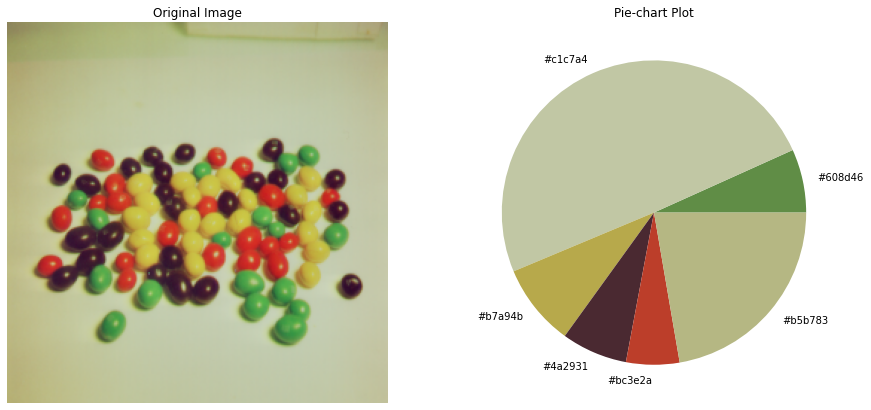

In [107]:
image_pros('4.1.08.tiff', 6, True)

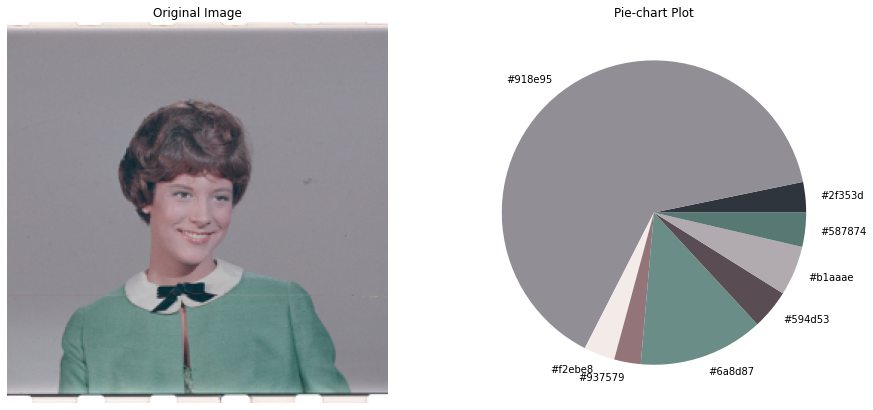

In [108]:
image_pros('4.1.03.tiff', 8, True)

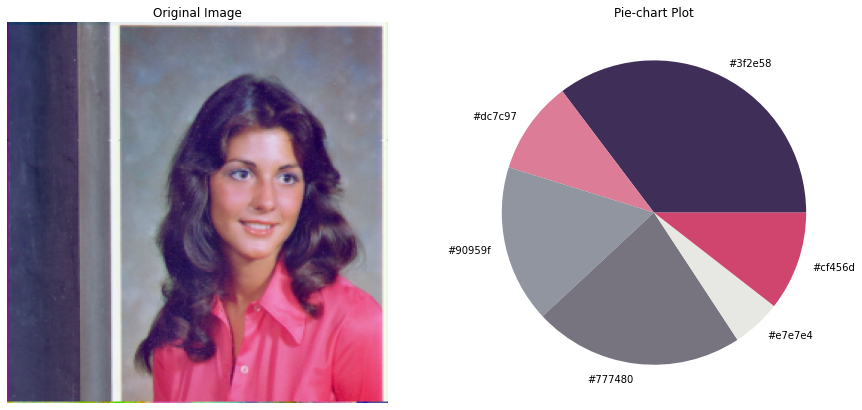

In [109]:
image_pros('4.1.04.tiff', 6, True)

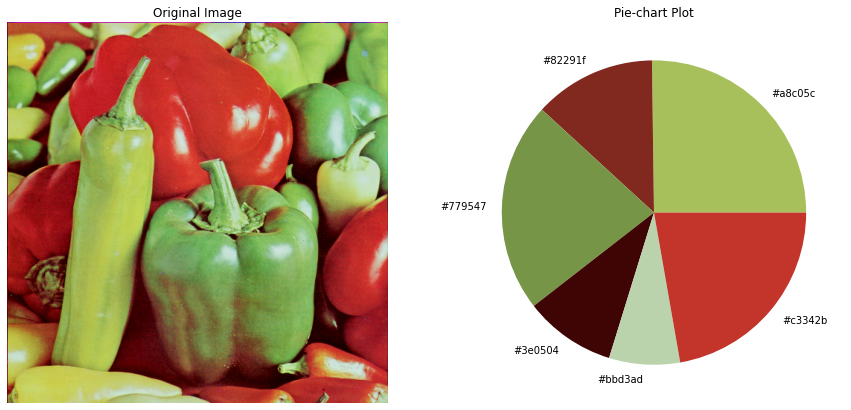

In [110]:
image_pros('4.2.07.tiff', 6, True)

<b>I have given some sample images with the result of main colors in the image. K-Means no. of cluster values are different for each image but you set it according to you. Using the elbow cluster value will result in more accuracy.